In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the slightly pre-processed data here 
dlc_output_data = pd.read_csv('Will_20984_Light_Var1_preproc.csv')

In [3]:
# Double-check the column names to make sure they are correct 
dlc_output_data.columns

Index(['coords', 'Snoutx', 'Snouty', 'LFLx', 'LFLy', 'RFLx', 'RFLy', 'LHLx',
       'LHLy', 'RHLx', 'RHLy', 'Tailtipx', 'Tailtipy'],
      dtype='object')

(-3, 3)

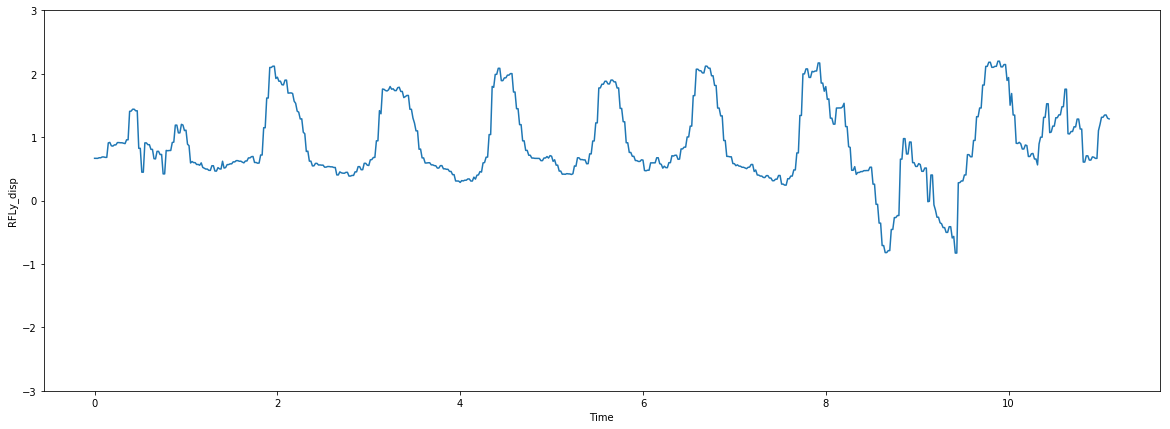

In [4]:
# get position of ladder from photoshop 


ladder_position = 91
height_of_video = 312
scale = 11 # 11 pixels = 1 cm for this video 

dlc_output_data['possum'] = 20984
dlc_output_data['condition'] = 'EB'
dlc_output_data['biosex'] = 'male'
dlc_output_data['lighting'] = 'light'
dlc_output_data['pattern'] = 4
dlc_output_data['Whiskers'] = 'NO'
dlc_output_data['Strike_Type'] = 'Miss'

########


# change everything to displacement from rung and add time in 
dlc_output_data['Snouty_disp'] = (height_of_video - dlc_output_data.Snouty - ladder_position)/scale
dlc_output_data['LFLy_disp'] = (height_of_video - dlc_output_data.LFLy - ladder_position)/scale
dlc_output_data['RFLy_disp'] = (height_of_video - dlc_output_data.RFLy - ladder_position)/scale
dlc_output_data['LHLy_disp'] = (height_of_video - dlc_output_data.LHLy - ladder_position)/scale
dlc_output_data['RHLy_disp'] = (height_of_video - dlc_output_data.RHLy - ladder_position)/scale
dlc_output_data['Tailtipy_disp'] = (height_of_video - dlc_output_data.Tailtipy - ladder_position)/scale
dlc_output_data['RFLx'] = dlc_output_data.RFLx / scale
dlc_output_data['Snoutx'] = dlc_output_data.Snoutx / scale
dlc_output_data['Tailtipx'] = dlc_output_data.Tailtipx / scale
dlc_output_data['LFLx'] = dlc_output_data.LFLx / scale
dlc_output_data['RHLx'] = dlc_output_data.RHLx / scale
dlc_output_data['LHLx'] = dlc_output_data.LHLx / scale

dlc_output_data['Time'] = ((dlc_output_data.coords / 120)*2)



# Plot a test figure 
plt.rcParams['figure.figsize']=(20,7)
sns.lineplot(x="Time", y="RFLy_disp", data=dlc_output_data)
plt.ylim(-3, 3)


In [5]:
data = dlc_output_data
data.columns

Index(['coords', 'Snoutx', 'Snouty', 'LFLx', 'LFLy', 'RFLx', 'RFLy', 'LHLx',
       'LHLy', 'RHLx', 'RHLy', 'Tailtipx', 'Tailtipy', 'possum', 'condition',
       'biosex', 'lighting', 'pattern', 'Whiskers', 'Strike_Type',
       'Snouty_disp', 'LFLy_disp', 'RFLy_disp', 'LHLy_disp', 'RHLy_disp',
       'Tailtipy_disp', 'Time'],
      dtype='object')

In [6]:
# Smooth the data with a gaussian filter to make finding the peaks easier 
from scipy.ndimage import gaussian_filter1d
rfl = data.RFLy_disp
rfl_blur = gaussian_filter1d(rfl,sigma = 2)

rfl_blur = rfl_blur #for the misses use rfl_blur * (-1)

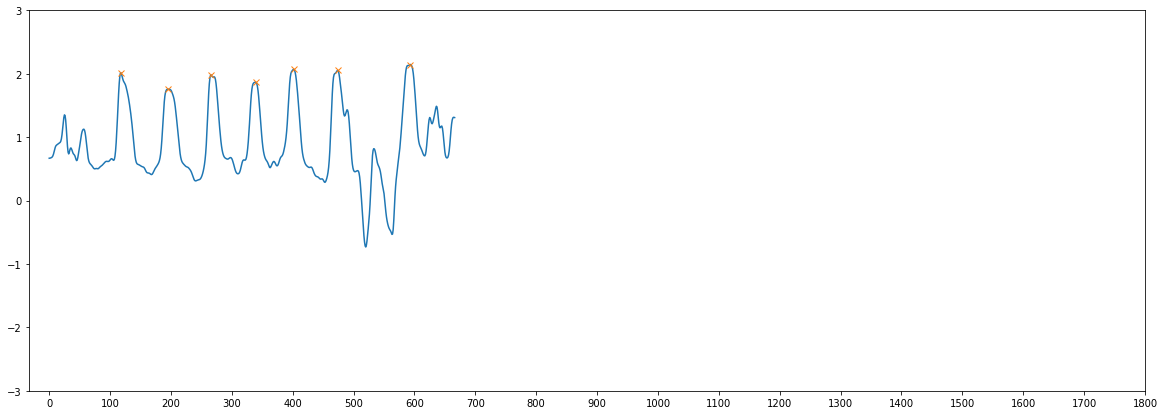

In [7]:
# Find the peaks and plot them 

from scipy.signal import find_peaks
x = rfl_blur 
peaks, _ = find_peaks(x, height = 1.5,distance = 25)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.xticks(np.arange(0, 1900, step=100))
plt.ylim(-3, 3)
plt.show()

In [8]:
# This is for method 2, which finds where threshold crosses are..not neccesary to run this
data['rflblur'] = rfl_blur
data['rflblur'] = data.rflblur.round(0)

def chunk_strikes2(dataset,threshold):
    current_frame = 0
    data2 = pd.DataFrame(columns = dataset.columns)  
    for index, row in dataset.iterrows(): 
        if (threshold - .5) < row['rflblur'] < (threshold + .3):
            current_frame += 1 
            data2.loc[index] = row
            #print (index)         
    return data2

In [9]:
data.columns

Index(['coords', 'Snoutx', 'Snouty', 'LFLx', 'LFLy', 'RFLx', 'RFLy', 'LHLx',
       'LHLy', 'RHLx', 'RHLy', 'Tailtipx', 'Tailtipy', 'possum', 'condition',
       'biosex', 'lighting', 'pattern', 'Whiskers', 'Strike_Type',
       'Snouty_disp', 'LFLy_disp', 'RFLy_disp', 'LHLy_disp', 'RHLy_disp',
       'Tailtipy_disp', 'Time', 'rflblur'],
      dtype='object')

In [10]:
## IF YOU CHOOSE METHOD 2 ####

# Run the chunk strikes function and get rid of adjacent points and then plot the threshold crosses
#a = chunk_strikes2(data,0)
#a['frame_diff'] = a['coords'] - a['coords'].shift()
#b = a[a['frame_diff'] != 1.0]

#https://python-graph-gallery.com/122-multiple-lines-chart/
#plt.rcParams['figure.figsize']=(18,6)
#plt.plot( 'RFLx', 'rflblur', data=b, marker='o', markerfacecolor='blue', markersize=15, color='skyblue', linewidth=0)
#plt.plot('RFLx', 'rflblur', data=data, marker='', color='olive', linewidth=2)
#plt.xticks(np.arange(0, 8, step=.5))
#plt.legend()


In [14]:
# METHOD 1 ##
#use the peaks method to get a list of peaks 
list_peaks = peaks.tolist()

# IF METHOD 2 ###
# Get the indexes of the above values,  it is only useful for chunkstrikes2
#c = list(b.index.values)
#c_frame = b.coords
#c_frame


# Take a look at the graph and this list, and then select what you want to remove 
list_peaks # or c_frame, depending on method 

[118, 195, 266, 339, 402, 474, 593]

In [15]:
# Remove the peaks you dont want 
list_peaks.remove(474)
list_peaks.remove(593)


# make a new DataFrame based on data, but containing only the data range we want
d = pd.DataFrame(columns = data.columns)
for indice in list_peaks: 
    f = data.loc[indice - 49: indice + 50]
    d = d.append(f)
    
#https://stackoverflow.com/questions/48346156/python-create-column-of-repeated-values-that-matches-length-of-dataframe
# ok now we want to group each strike 
from math import floor
val = 0 
d['strike'] = [val + floor(i / 100) for i in range(len(d.index))] 
listit = list(range(100))


# https://stackoverflow.com/questions/46063428/filling-a-pandas-dataframe-with-repeating-values
# now we want to add x_values so we can align each strike 
d['x_vals'] = np.tile(listit,len(list_peaks)) #or use c_frame if using other method 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


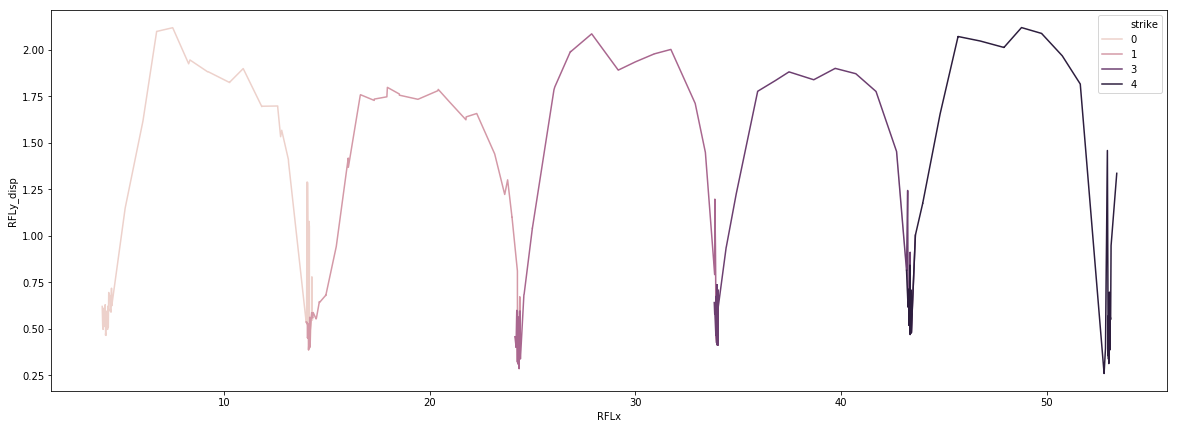

In [16]:
# plot each strike - you should see holes where you removed those peaks from the list 
sns.lineplot(x="RFLx", y="RFLy_disp", hue="strike",data=d)



In [17]:
# this sections aligns all peaks by x values by shifting, subtracting, and then using cumsum 

def func(single_group_data):
    x_displacement = single_group_data['RFLx'].max() - single_group_data['RFLx'].min()
    x_disp = x_displacement.round(0)
    #single_group_data.reset_index(drop=True)
    #single_group_data['RFLx_align'] = np.linspace(0,x_disp,num = len(single_group_data))# for evevnly spaced use this
    single_group_data['RFLx_diff'] = single_group_data['RFLx'] - single_group_data['RFLx'].shift()
    single_group_data['RFLx_cumsum'] = single_group_data.RFLx_diff.cumsum()
    
    
    # now this should do the x component for snout 
    single_group_data['Snoutx_diff'] = single_group_data['Snoutx'] - single_group_data['Snoutx'].shift()
    single_group_data['Snoutx_cumsum'] = single_group_data.Snoutx_diff.cumsum()
    
    #LFL, RHL, LHL, Tail:
    single_group_data['LFLx_diff'] = single_group_data['LFLx'] - single_group_data['LFLx'].shift()
    single_group_data['LFLx_cumsum'] = single_group_data.LFLx_diff.cumsum()
    
    single_group_data['RHLx_diff'] = single_group_data['RHLx'] - single_group_data['RHLx'].shift()
    single_group_data['RHLx_cumsum'] = single_group_data.RHLx_diff.cumsum()
    
    single_group_data['LHLx_diff'] = single_group_data['LHLx'] - single_group_data['LHLx'].shift()
    single_group_data['LHLx_cumsum'] = single_group_data.LHLx_diff.cumsum()
    
    single_group_data['Tailtipx_diff'] = single_group_data['Tailtipx'] - single_group_data['Tailtipx'].shift()
    single_group_data['Tailtipx_cumsum'] = single_group_data.Tailtipx_diff.cumsum()
    
    return single_group_data


d_rflx_align = d.groupby('strike').apply(func)
d_rflx_align['RFL_vector'] = (d_rflx_align.RFLx_cumsum**2) + (d_rflx_align.RFLy_disp**2)
d_rflx_align['RFL_vector'] = (d_rflx_align.RFL_vector**.5)




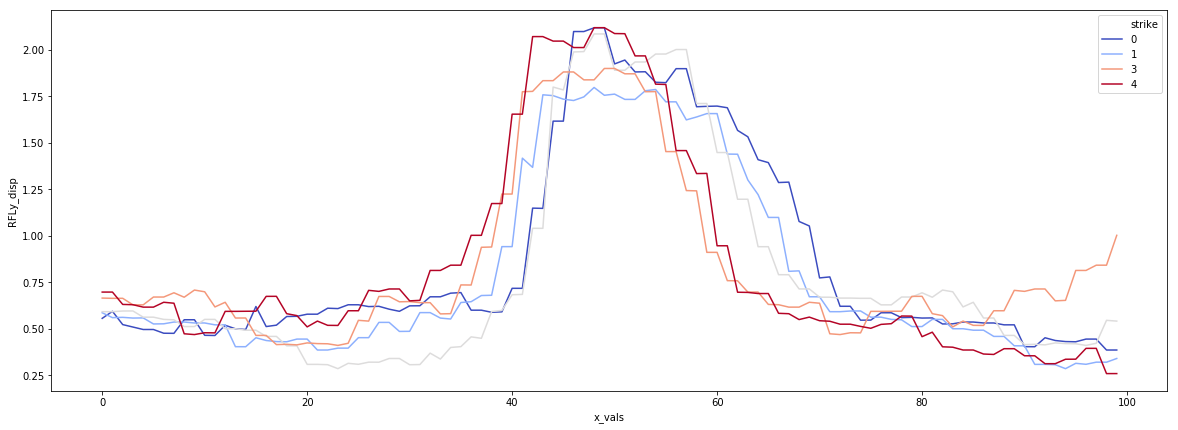

In [18]:
# now plot the lined-up peaks separate
sns.lineplot(x="x_vals", y="RFLy_disp",hue = 'strike',data=d_rflx_align,palette='coolwarm')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


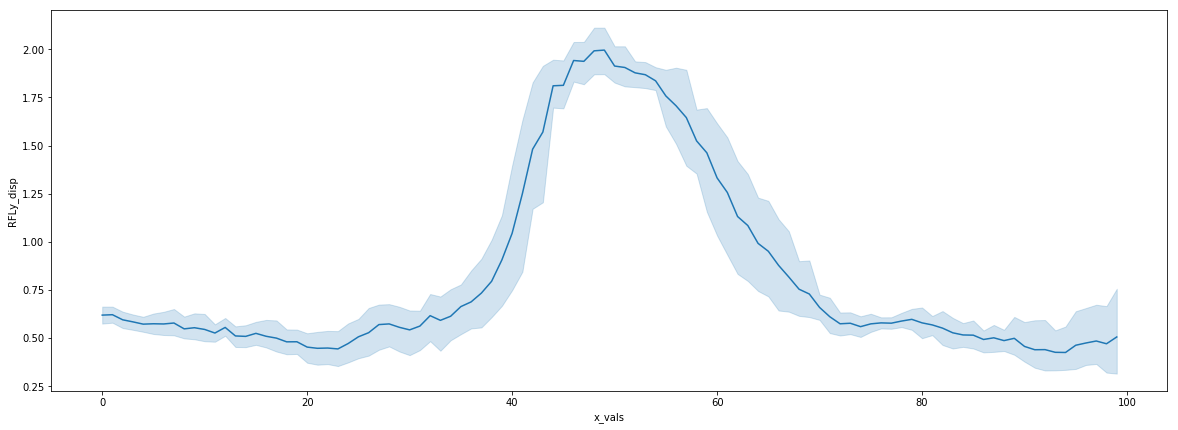

In [19]:
# and plot the combined waveform 
sns.lineplot(x="x_vals", y="RFLy_disp",data=d_rflx_align)

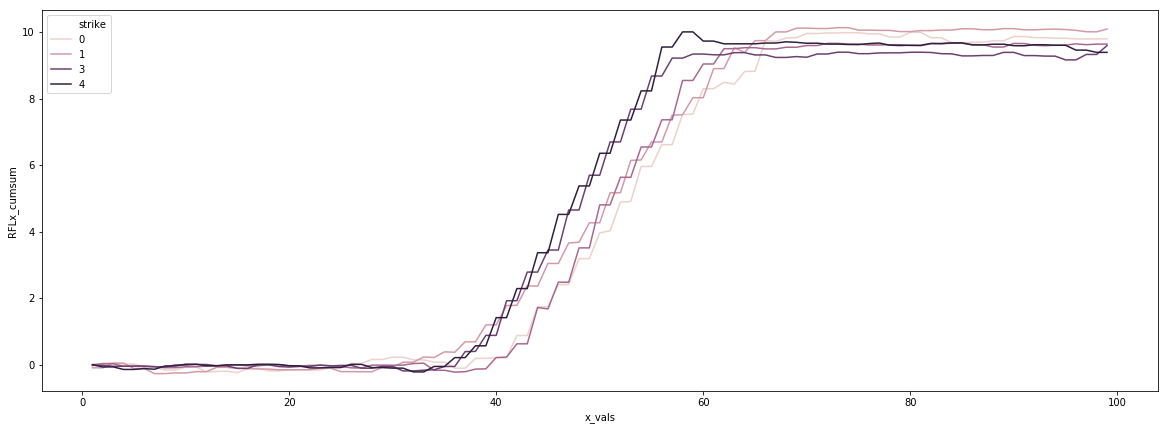

In [20]:
# plot the x component
sns.lineplot(x="x_vals", y="RFLx_cumsum",hue = 'strike',data=d_rflx_align)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


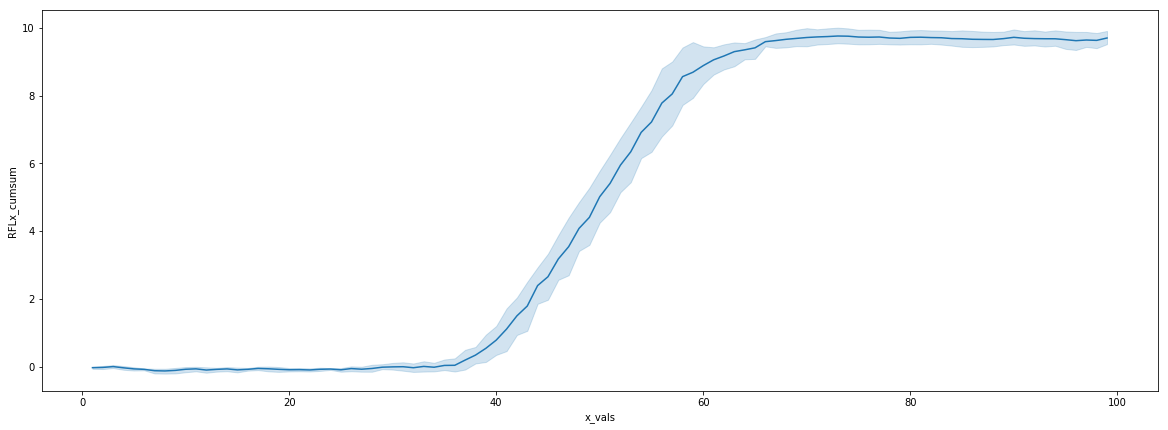

In [21]:
# and the combined x 
sns.lineplot(x="x_vals", y="RFLx_cumsum",data=d_rflx_align)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


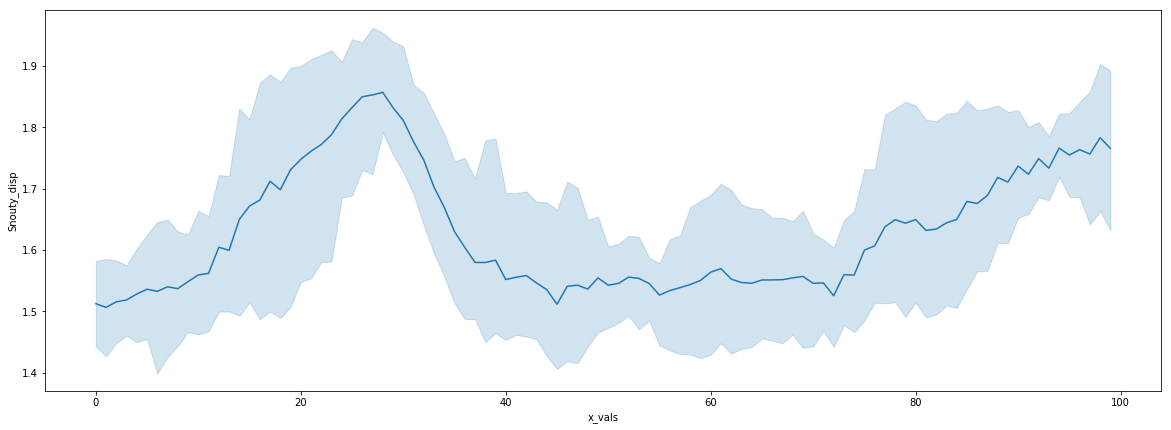

In [23]:
# now you can plot any body part over the same time, shown here with the snout 
sns.lineplot(x="x_vals", y="Snouty_disp",data=d_rflx_align)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


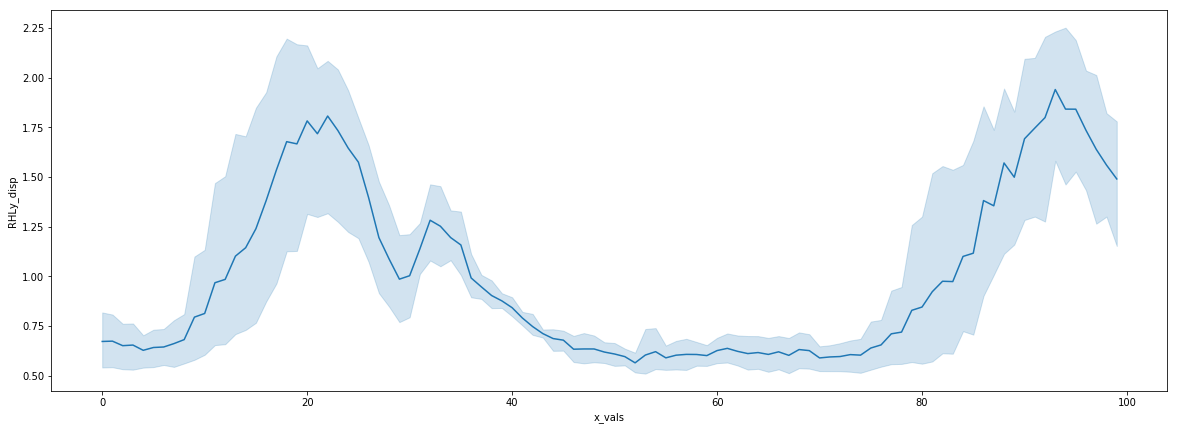

In [25]:
# or right hindlimb
sns.lineplot(x="x_vals", y="RHLy_disp",data=d_rflx_align)